# Problem statement
##### Forecast The Airlines Passengers data set.

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


# Importing Libraries

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV File

In [4]:
air = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')
air= air.set_index('Month')
air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# EDA


In [5]:
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [6]:
# assigning frequency to datetimeindex
air.index.freq = 'MS' 

In [7]:
#index values of a DataFrame
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [8]:
# to see number of rows and columns
air.shape

(96, 1)

In [9]:
# information about dataframe
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [10]:
#Generates descriptive statistics of the DataFrame
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [11]:
#Calculates and displays the count of unique values
air.value_counts()

Passengers
229           3
237           2
172           2
178           2
180           2
             ..
181           1
171           1
166           1
163           1
413           1
Length: 80, dtype: int64

In [12]:
#Counts the number of duplicated rows in the DataFrame
air.duplicated().sum()

16

# Visualization

### Time Series Analysis

<AxesSubplot:xlabel='Month'>

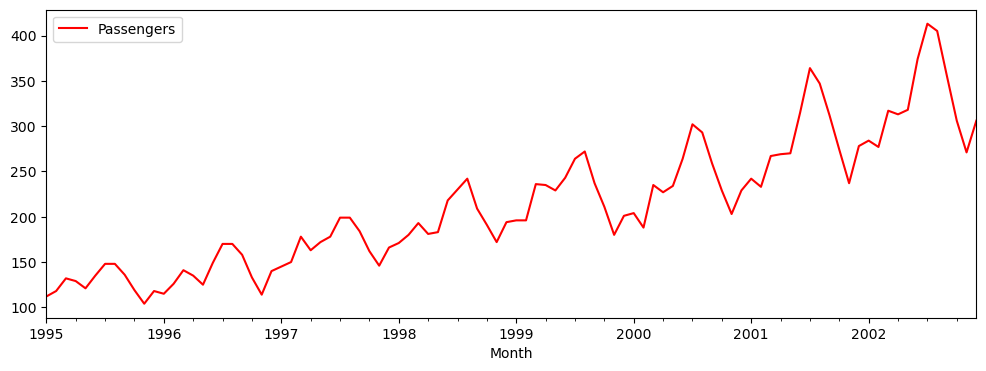

In [14]:
#Line plot
air.plot(figsize=(12,4), color='r')

<AxesSubplot:>

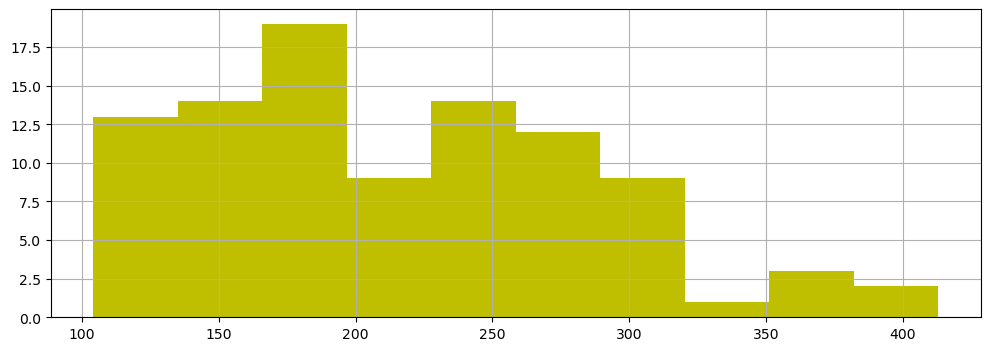

In [15]:
# Histogram
air['Passengers'].hist(figsize=(12,4),color='y')

<AxesSubplot:ylabel='Density'>

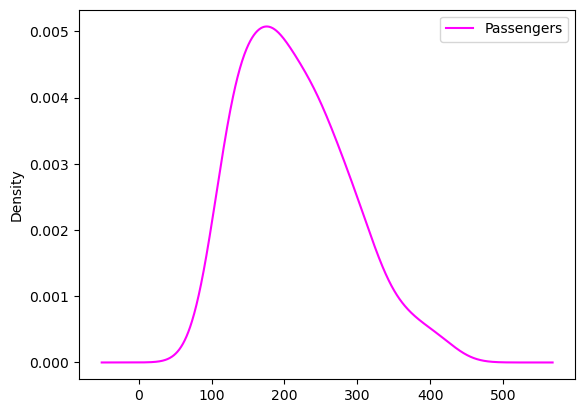

In [17]:
# Density plot
air.plot(kind='kde', color='magenta')

In [18]:
#Computes descriptive statistics of the DataFrame
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Time Series Decomposition

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Seasonal decompose

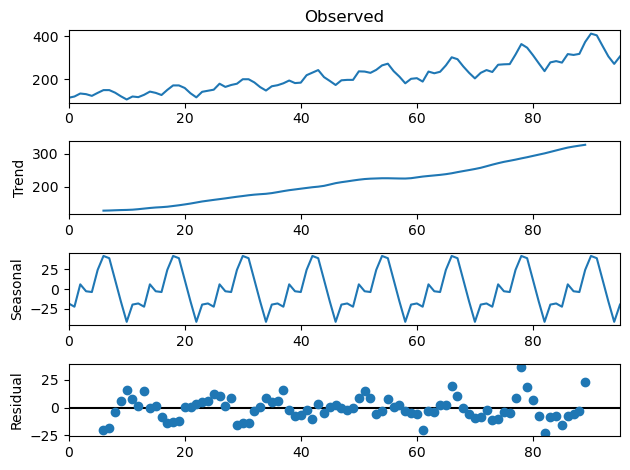

In [20]:
# Additive Seasonality
# frequency=12 for monthly data
ts_decomp= seasonal_decompose((air.values),model='additive',period = 12)
ts_plot = ts_decomp.plot()

### Multiplicative Seasonal Decompose

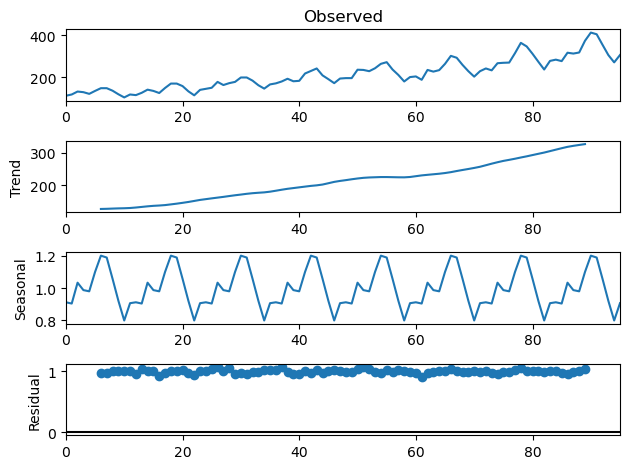

In [21]:
# Multiplicative seasonality
# frequency=12 for monthly data
ts_decomp_mul= seasonal_decompose((air.values),model='multiplicative',period = 12)
ts_plot_mul = ts_decomp_mul.plot()

## Forecasting models building

We will forecast last two years 2001 and 2002 so the last 24 records will be test data and first 72 records will be training data.

# Splitting into Training Testing Data

In [22]:
# here because of the forcasting we use horizontal(row wise) splitting
air_train=air[0:72]
air_test=air[72:]

In [23]:
print("Length of train data is:",len(air_train))
print("Length of test data is:",len(air_test))

Length of train data is: 72
Length of test data is: 24


In [24]:
#Displays the first five rows of the train DataFrame
air_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [25]:
#Displays the first five rows of the test DataFrame
air_test.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


## Methods for Forecasting

## 1.  Simple Moving Average 

In [26]:
# in this method we use average (mean)
air_ma=air.copy()

In [27]:
train_len=72

In [28]:
# adding one column ma_forecast with rolling mean of Passengers column
air_ma['ma_forecast'] = air_ma['Passengers'].rolling(12).mean()

In [29]:
#Assigns the value of the 'ma_forecast' column
air_ma['ma_forecast'][train_len:] = air_ma['ma_forecast'][train_len-1]

# Calculating MSE

In [30]:
# importing Mean Squared error
from sklearn.metrics import mean_squared_error

In [31]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(air_test['Passengers'],air_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

82.89

# inference
The resulting RMSE value is 82.89, rounded to two decimal places. The RMSE is a measure of the average difference between the predicted values and the actual values. In this case, it indicates that, on average, the forecasted values differ from the actual values by approximately 82.89 units (which is not specified in the code)

## 2.  Simple Exponential Smoothing

In [32]:
# Uses exponential growth model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [33]:
ses_model = SimpleExpSmoothing(air_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [34]:
rmse_ses = mean_squared_error(air_test['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

83.65

# inference
The resultant root mean square error (RMSE) value is 83.65, rounded off to two decimal places. This value signifies that, on average, the predicted values using the simple exponential smoothing (SES) technique deviate from the observed values by approximately 83.65 units (which is not specified within the provided code).

When comparing this RMSE value to the previous one (82.89), it appears that the SES method exhibits a slightly higher forecasting error in comparison to the prior method (which is not explicitly mentioned in the given code). However, it is essential to note that the interpretation and comparison of RMSE values depend on the specific context and the range of the dataset under analysis.

## 3. Holt's Method

In [35]:
# Holt's method
from statsmodels.tsa.holtwinters import Holt

In [36]:
holt_model = Holt(air_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [37]:
rmse_holt = mean_squared_error(air_test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

148.19

# Inference
The RMSE value obtained is 148.19, after rounding to two decimal places. This value signifies that, on average, there is a difference of approximately 148.19 units between the forecasted values using Holt's linear method and the actual values (which is not specified in the code).

When comparing this RMSE value with the previous ones (82.89 and 83.65), it appears that the Holt's linear method exhibits a higher forecasting error in comparison to both the moving average (MA) and simple exponential smoothing (SES) methods. Once again, it is crucial to consider the specific context and the range of the dataset being analyzed to accurately interpret and compare RMSE values.

## 4. Holt's Exponential Smoothing

### a. Additive method

In [38]:
# Holt's Exponential Smoothing-Additive method
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [39]:
hes_add_add = ExponentialSmoothing(air_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = air_test.index[0],end = air_test.index[-1])

In [40]:
rmse_hes_add_add = mean_squared_error(air_test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

47.57

# Inference
The RMSE value obtained is 47.57, rounded to two decimal places. This value implies that, on average, there is an approximately 47.57-unit difference between the forecasted values using the Holt-Winters' method with additive seasonality and additive trend (Holt-Winters' additive-additive, HES-Add-Add) and the actual values (although not explicitly mentioned in the code).

When comparing this RMSE value to the previous ones (82.89, 83.65, and 148.19), it appears that the HES-Add-Add method exhibits a lower forecasting error in comparison to all the prior methods (MA, SES, and Holt's linear). A lower RMSE value indicates that the HES-Add-Add method delivers more accurate forecasts by capturing the patterns and variations present in the dataset.

It's crucial to always consider the specific context and the dataset's range under analysis while interpreting and comparing RMSE values.

### b. Multiplicative method

In [41]:
# Holt's Exponential Smoothing-Multiplicative method
hes_mul_add = ExponentialSmoothing(air_train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = air_test.index[0],end = air_test.index[-1])

In [42]:
rmse_hes_mul_add = mean_squared_error(air_test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.99

# Inference
The resulting RMSE value, which is rounded to two decimal places, is 34.99. This value indicates that, on average, there is an approximately 34.99 unit difference between the forecasted values using the HES-Mul-Add method and the actual values (the code does not specify this).

When comparing this RMSE value with the previous ones (82.89, 83.65, 148.19, and 47.57), it becomes apparent that the HES-Mul-Add method exhibits the lowest forecasting error among all the discussed methods. A lower RMSE value suggests that the HES-Mul-Add method offers the most accurate forecasts, effectively capturing the patterns and variations present in the dataset.

## Auto Regressive (AR) model

For this model, non stationary time series needs to be converted to stationary time series. ARIMA model automatically perfrorms differencing to convert non-stationary series to stationary series.

## 5. ARIMA Model:-

### ACF plot

In [43]:
# in this we use plots
from statsmodels.graphics.tsaplots import plot_acf

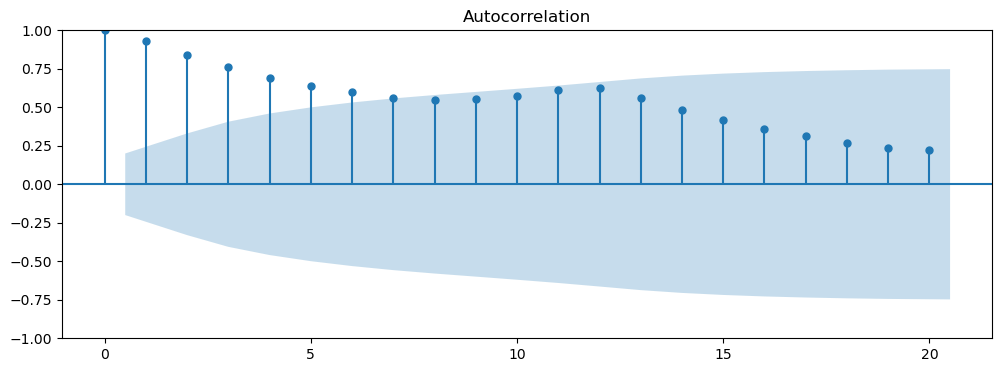

In [44]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

The above plot shows that auto correlation is significant for lag=1

### PCF plot

In [45]:
# PCF Plot
from statsmodels.graphics.tsaplots import plot_pacf

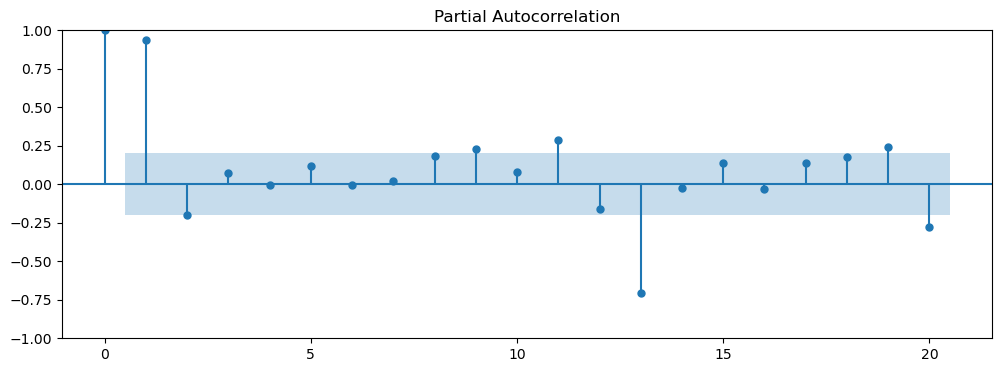

In [46]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [49]:
arima = ARIMA(air_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = air_test.index[0],end = air_test.index[-1])

In [50]:
rmse_arima = mean_squared_error(air_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

# Inference
The resulting RMSE value is 88.96, rounded to two decimal places. This value indicates that, on average, the forecasted values using the ARIMA method differ from the actual values by approximately 88.96 units (which is not specified in the code).

Comparing this RMSE value to the previous ones (82.89, 83.65, 148.19, 47.57, and 34.99), it appears that the ARIMA method has a higher forecasting error compared to some of the methods mentioned earlier, such as the HES-Mul-Add and MA. However, it's important to note that the performance of the ARIMA method can vary depending on the specific characteristics and patterns present in the dataset.

## Choosing the best model

In [51]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
2,Holt,148.19
3,Holt_additive,47.57
4,Holt_multiplicative,34.99
5,ARIMA,88.96


In [52]:
df_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.99
3,Holt_additive,47.57
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
5,ARIMA,88.96
2,Holt,148.19


So Holt_multiplicative smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest rmse.